# TP 3 : Classification non linéaire 
# Dani Halegua - Luca Champesting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
def y(x1, x2):
    if ( -1 <= x1 <= -0.5 or 0 <= x1 <= 0.5) and ( -1 <= x2 <= -0.5 or 0 <= x2 <= 0.5):
        return 1
    elif ( -0.5 <= x1 <= 0 or 0.5 <= x1 <= 1) and ( -0.5 <= x2 <= 0 or 0.5 <= x2 <= 1):
        return 1
    else :
        return -1

def ech_train_test(nbApp, nbTest):
    X_train = np.random.uniform(-1, 1, (nbApp, 2))
    y_train = np.zeros(nbApp)
    X_test = np.random.uniform(-1, 1, (nbTest, 2))
    y_test = np.zeros(nbTest)
    for i in range(nbApp):
        y_train[i] = y(X_train[:,0][i], X_train[:,1][i])
    for j in range(nbTest):
        y_test[j] = y(X_test[:,0][j], X_test[:,1][j])
    return X_train, y_train, X_test, y_test

nbApp = 300; nbTest = 1000
X_train, y_train, X_test, y_test = ech_train_test(nbApp, nbTest)

In [143]:
def transform(x1,x2,dpoly):
    f = []
    for i in range (1,dpoly):
        for j in range(1,dpoly):
            if(i+j)<dpoly+1:
                f+=[(x1**(i+1))*(x2**(j+1))]
    return np.array(f)

def create_data(X,dpoly):
    n = X.shape[0]
    s=0
    for i in range(1,dpoly):
        s+=i
    df = np.zeros((n,s))
    
    for j in range(n):
        for i in range (s):
            df[j,i] = transform(X[j][0],X[j][1],dpoly)[i]
    return pd.DataFrame(df)
        
    
    
    
    

In [125]:
dpoly = 5
X_train2 = create_data(X_train,dpoly)
X_test2 = create_data(X_test,dpoly)


10
10


In [126]:
X_train2

,0,1,2,3,4,5,6,7,8,9
0,0.111140,-0.080455,0.058242,-0.042161,0.051183,-0.037051,0.026822,0.023571,-0.017063,0.010855
1,0.078095,0.033007,0.013951,0.005896,-0.051635,-0.021824,-0.009224,0.034140,0.014430,-0.022573
2,0.095374,-0.041622,0.018164,-0.007927,-0.067491,0.029454,-0.012854,0.047760,-0.020843,-0.033797
3,0.221029,-0.172315,0.134337,-0.104730,-0.133291,0.103914,-0.081012,0.080381,-0.062665,-0.048474
4,0.027924,-0.007755,0.002154,-0.000598,0.016803,-0.004666,0.001296,0.010111,-0.002808,0.006084
...,...,...,...,...,...,...,...,...,...,...
295,0.071797,-0.036976,0.019043,-0.009807,0.037355,-0.019238,0.009908,0.019435,-0.010009,0.010112
296,0.092008,-0.038442,0.016062,-0.006711,-0.066796,0.027908,-0.011661,0.048493,-0.020261,-0.035205
297,0.116353,0.086025,0.063602,0.047024,-0.053681,-0.039689,-0.029344,0.024766,0.018311,-0.011426
298,0.110658,0.110169,0.109682,0.109197,-0.036974,-0.036811,-0.036648,0.012354,0.012300,-0.004128


In [127]:
from sklearn.svm import SVC

In [134]:
C = 1/10
clf = SVC(C=C, kernel='linear')
clf.fit(X_train2,y_train)
y_pred = clf.predict(X_test2)

SVC(C=0.1, kernel='linear')

In [130]:
cpt=0
for i in range(len(y_test)):
    if (y_pred[i]!=y_test[i]):
        cpt+=1
print("Erreur = ", cpt/len(y_test))

clf.score(X_train2,y_train)

Erreur =  0.49


0.54

In [175]:
def afficher(poly_gauss,X_train,y_train,X_test,y_test,dpoly,C,kernel):
    
    if poly_gauss == 1:                             #NOYAU POLY
        X_train2 = create_data(X_train,dpoly)
        X_test2 = create_data(X_test,dpoly)
        clf = SVC(C=C, kernel=kernel)
        clf.fit(X_train2,y_train)
        y_pred_train = clf.predict(X_train2)
        y_pred_test = clf.predict(X_test2)
    
    else:                                         #NOYAU GAUSSIEN
        clf = SVC(C=C, kernel=kernel)
        clf.fit(X_train,y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

    plt.figure(figsize=(12,12))
    for i in range(X_train.shape[0]):
        if (y_train[i]==-1) and (y_pred_train[i]==-1):
            plt.scatter(X_train[i][0],X_train[i][1],color ='red')
        elif (y_train[i]==-1) and (y_pred_train[i]==1):
            plt.scatter(X_train[i][0],X_train[i][1],color ='red',marker = 'x')
        elif(y_train[i]==1) and (y_pred_train[i]==1):
            plt.scatter(X_train[i][0],X_train[i][1],color ='black')
        else:
            plt.scatter(X_train[i][0],X_train[i][1],color ='black',marker = 'x')
    
    for i in range(X_test.shape[0]):
        if (y_test[i]==-1) and (y_pred_test[i]==-1):
            plt.scatter(X_test[i][0],X_test[i][1],color ='red')
        elif(y_test[i]==-1) and (y_pred_test[i]==1):
            plt.scatter(X_test[i][0],X_test[i][1],color ='red',marker ='x')
        elif(y_test[i]==1) and (y_pred_test[i]==1):
            plt.scatter(X_test[i][0],X_test[i][1],color ='black')
        else:
            plt.scatter(X_test[i][0],X_test[i][1],color ='black',marker='x')
    plt.show()
        


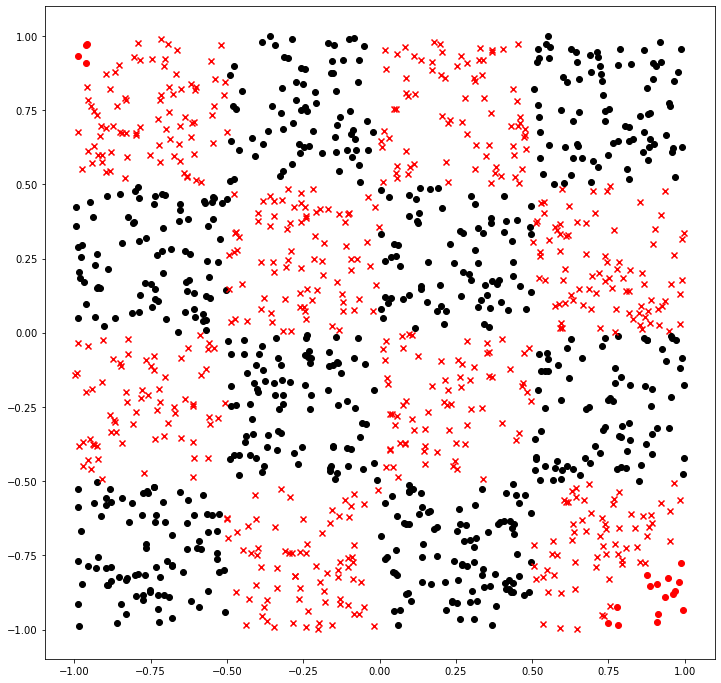

In [171]:
afficher(1,X_train,y_train,X_test,y_test, 5, 1/10,'linear')

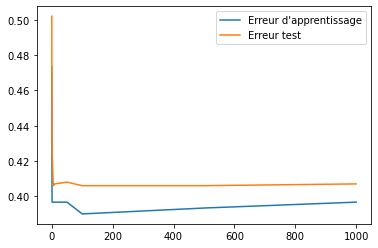

In [138]:
C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
err_test=[]
err_train=[]
for c in C:
    clf = SVC(C=c, kernel='linear')
    clf.fit(X_train2,y_train)
    err_train+=[1-clf.score(X_train2,y_train)]
    err_test+=[1-clf.score(X_test2,y_test)]

plt.plot(C,err_train,label="Erreur d'apprentissage")
plt.plot(C,err_test,label="Erreur test")
plt.legend()
plt.show()

In [140]:
err_train

[0.4733333333333334,
 0.45999999999999996,
 0.44999999999999996,
 0.42000000000000004,
 0.4,
 0.3966666666666666,
 0.3966666666666666,
 0.3966666666666666,
 0.3966666666666666,
 0.39,
 0.3933333333333333,
 0.3966666666666666]

In [141]:
err_test

[0.502,
 0.49,
 0.46699999999999997,
 0.44499999999999995,
 0.43500000000000005,
 0.42500000000000004,
 0.406,
 0.40700000000000003,
 0.40800000000000003,
 0.406,
 0.406,
 0.40700000000000003]

Meilleur score pour $C=100$

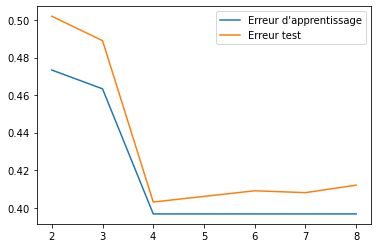

In [145]:
dpoly=[i for i in range(2,9)]
err_test=[]
err_train=[]
C=5
for d in dpoly:
    X_train2 = create_data(X_train,d)
    X_test2 = create_data(X_test,d)
    clf = SVC(C=C, kernel='linear')
    clf.fit(X_train2,y_train)
    err_train+=[1-clf.score(X_train2,y_train)]
    err_test+=[1-clf.score(X_test2,y_test)]

plt.plot(dpoly,err_train,label="Erreur d'apprentissage")
plt.plot(dpoly,err_test,label="Erreur test")
plt.legend()
plt.show() 

Meilleur score pour dpoly = 4

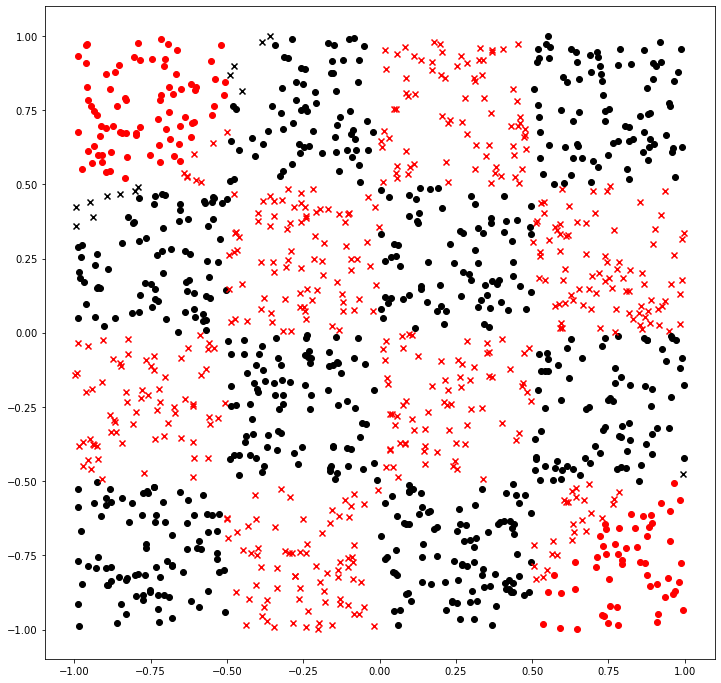

In [172]:
afficher(1,X_train,y_train,X_test,y_test, 4, 100,'linear')

## Noyau gaussien
Kernel par défaut dans scikit-learn

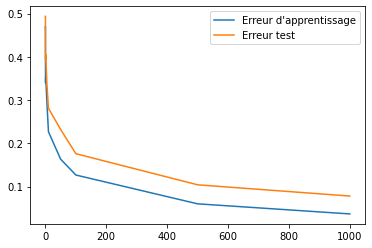

In [160]:
C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
err_test=[]
err_train=[]
for c in C:
    clf = SVC(C=c)
    clf.fit(X_train,y_train)
    err_train+=[1-clf.score(X_train,y_train)]
    err_test+=[1-clf.score(X_test,y_test)]

plt.plot(C,err_train,label="Erreur d'apprentissage")
plt.plot(C,err_test,label="Erreur test")
plt.legend()
plt.show()

Plus C est grand, meilleur est le score

In [164]:
C=1000
clf = SVC(C=C,gamma='auto')
clf.fit(X_train,y_train)
print("Erreur sur le jeu d'entrainement avec gamma = 'auto'",1-clf.score(X_train,y_train))
print("Erreur sur le jeu test avec gamma = 'auto'",1-clf.score(X_test,y_test))


clf2 = SVC(C=C,gamma='scale')
clf2.fit(X_train,y_train)
print("Erreur sur le jeu d'entrainement avec gamma = 'scale'",1-clf2.score(X_train,y_train))
print("Erreur sur le jeu test avec gamma = 'scale'",1-clf2.score(X_test,y_test))




Erreur sur le jeu d'entrainement avec gamma = 'auto' 0.2633333333333333
Erreur sur le jeu test avec gamma = 'auto' 0.31000000000000005
Erreur sur le jeu d'entrainement avec gamma = 'scale' 0.036666666666666625
Erreur sur le jeu test avec gamma = 'scale' 0.07799999999999996


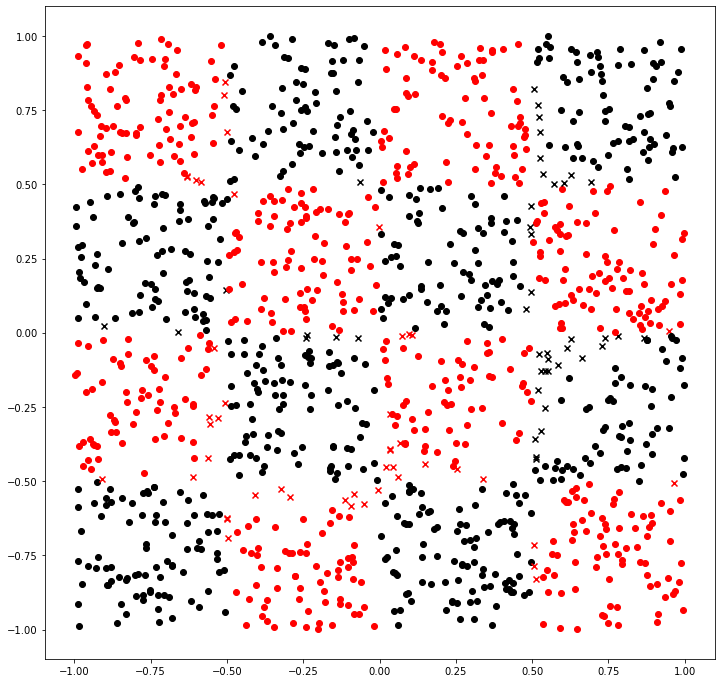

In [176]:
afficher(0,X_train,y_train,X_test,y_test, 0, 1000,'rbf')    #gamma is set at 'scale' by default

Le noyau gaussien couplé à un $\gamma =$ 'scale', ie = 1 / (n_features * var(X)) donne de bien meilleurs résultats que précedemment!

# Exercice 2

In [177]:
def y2(x1,x2):
    if (50*x1**2+0.5*x2**2-1)>0:
        return 1
    else:
        return -1

    
def ech_train_test2(nbApp, nbTest):
    X_train = np.random.uniform(-1, 1, (nbApp, 2))
    y_train = np.zeros(nbApp)
    X_test = np.random.uniform(-1, 1, (nbTest, 2))
    y_test = np.zeros(nbTest)
    for i in range(nbApp):
        y_train[i] = y(X_train[:,0][i], X_train[:,1][i])
    for j in range(nbTest):
        y_test[j] = y2(X_test[:,0][j], X_test[:,1][j])
    return X_train, y_train, X_test, y_test

nbApp = 150; nbTest = 500
X_train, y_train, X_test, y_test = ech_train_test2(nbApp, nbTest)

In [181]:
dpoly = 5
X_train2 = create_data(X_train,dpoly)
X_test2 = create_data(X_test,dpoly)

In [182]:
C = 1/10
clf = SVC(C=C, kernel='linear')
clf.fit(X_train2,y_train)
y_pred = clf.predict(X_test2)

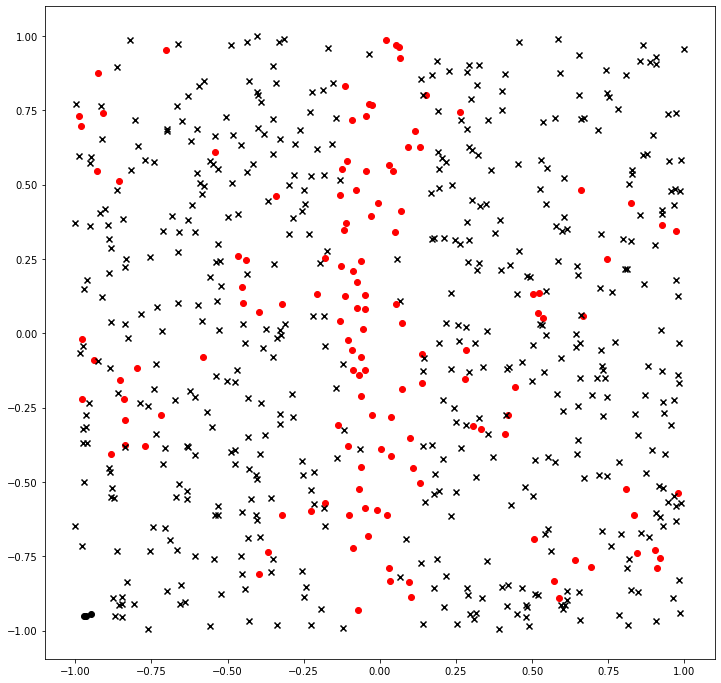

In [183]:
afficher(1,X_train,y_train,X_test,y_test, 5, 1/10,'linear')

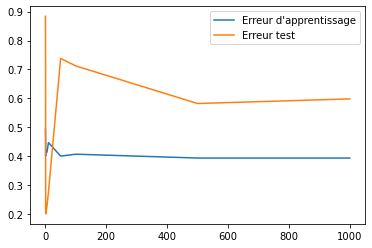

In [184]:
C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
err_test=[]
err_train=[]
for c in C:
    clf = SVC(C=c, kernel='linear')
    clf.fit(X_train2,y_train)
    err_train+=[1-clf.score(X_train2,y_train)]
    err_test+=[1-clf.score(X_test2,y_test)]

plt.plot(C,err_train,label="Erreur d'apprentissage")
plt.plot(C,err_test,label="Erreur test")
plt.legend()
plt.show()

In [185]:
err_test

[0.884,
 0.88,
 0.862,
 0.744,
 0.22399999999999998,
 0.19999999999999996,
 0.22599999999999998,
 0.276,
 0.738,
 0.712,
 0.5820000000000001,
 0.598]

In [186]:
err_train

[0.4933333333333333,
 0.4866666666666667,
 0.48,
 0.4666666666666667,
 0.4,
 0.42000000000000004,
 0.41333333333333333,
 0.44666666666666666,
 0.4,
 0.4066666666666666,
 0.3933333333333333,
 0.3933333333333333]

Best result pour C=1

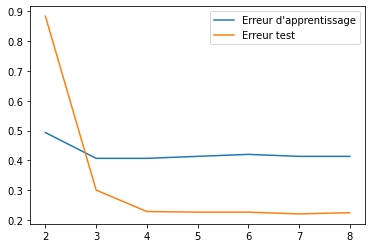

In [187]:
dpoly=[i for i in range(2,9)]
err_test=[]
err_train=[]
C=5
for d in dpoly:
    X_train2 = create_data(X_train,d)
    X_test2 = create_data(X_test,d)
    clf = SVC(C=C, kernel='linear')
    clf.fit(X_train2,y_train)
    err_train+=[1-clf.score(X_train2,y_train)]
    err_test+=[1-clf.score(X_test2,y_test)]

plt.plot(dpoly,err_train,label="Erreur d'apprentissage")
plt.plot(dpoly,err_test,label="Erreur test")
plt.legend()
plt.show() 

In [188]:
err_test

[0.884,
 0.30000000000000004,
 0.22799999999999998,
 0.22599999999999998,
 0.22599999999999998,
 0.21999999999999997,
 0.22399999999999998]

In [189]:
err_train

[0.4933333333333333,
 0.4066666666666666,
 0.4066666666666666,
 0.41333333333333333,
 0.42000000000000004,
 0.41333333333333333,
 0.41333333333333333]

Best result pour dpoly = 7

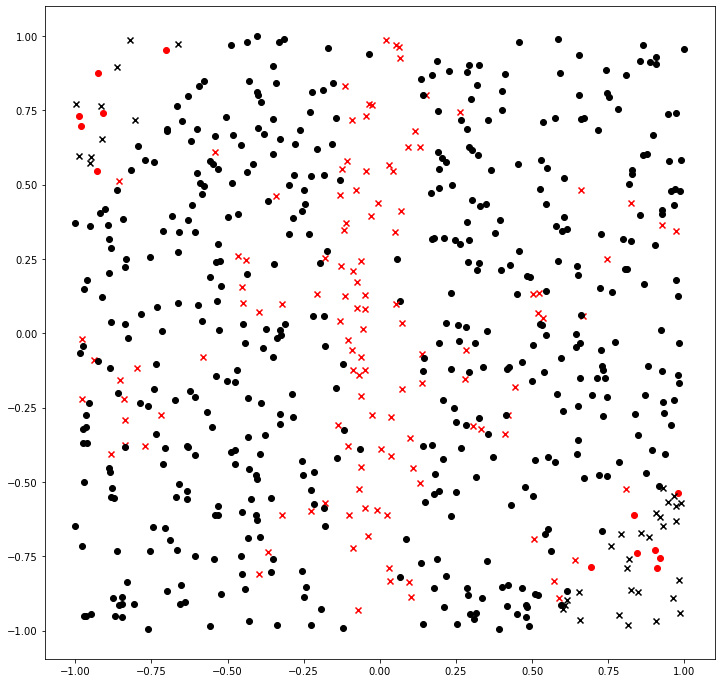

In [191]:
afficher(1,X_train,y_train,X_test,y_test, 7, 1,'linear')

## Noyau gaussien

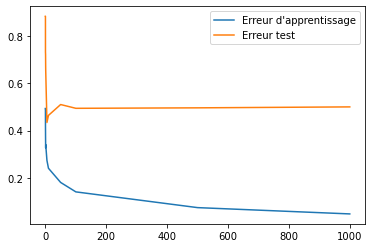

In [192]:
C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
err_test=[]
err_train=[]
for c in C:
    clf = SVC(C=c)
    clf.fit(X_train,y_train)
    err_train+=[1-clf.score(X_train,y_train)]
    err_test+=[1-clf.score(X_test,y_test)]

plt.plot(C,err_train,label="Erreur d'apprentissage")
plt.plot(C,err_test,label="Erreur test")
plt.legend()
plt.show()

In [193]:
err_test    #best result pour C = 5

[0.884,
 0.884,
 0.732,
 0.722,
 0.6719999999999999,
 0.654,
 0.43400000000000005,
 0.46399999999999997,
 0.51,
 0.494,
 0.496,
 0.5]

In [195]:
C=5
clf = SVC(C=C,gamma='auto')
clf.fit(X_train,y_train)
print("Erreur sur le jeu d'entrainement avec gamma = 'auto'",1-clf.score(X_train,y_train))
print("Erreur sur le jeu test avec gamma = 'auto'",1-clf.score(X_test,y_test))


clf2 = SVC(C=C,gamma='scale')
clf2.fit(X_train,y_train)
print("Erreur sur le jeu d'entrainement avec gamma = 'scale'",1-clf2.score(X_train,y_train))
print("Erreur sur le jeu test avec gamma = 'scale'",1-clf2.score(X_test,y_test))


Erreur sur le jeu d'entrainement avec gamma = 'auto' 0.3666666666666667
Erreur sur le jeu test avec gamma = 'auto' 0.6639999999999999
Erreur sur le jeu d'entrainement avec gamma = 'scale' 0.2733333333333333
Erreur sur le jeu test avec gamma = 'scale' 0.43400000000000005


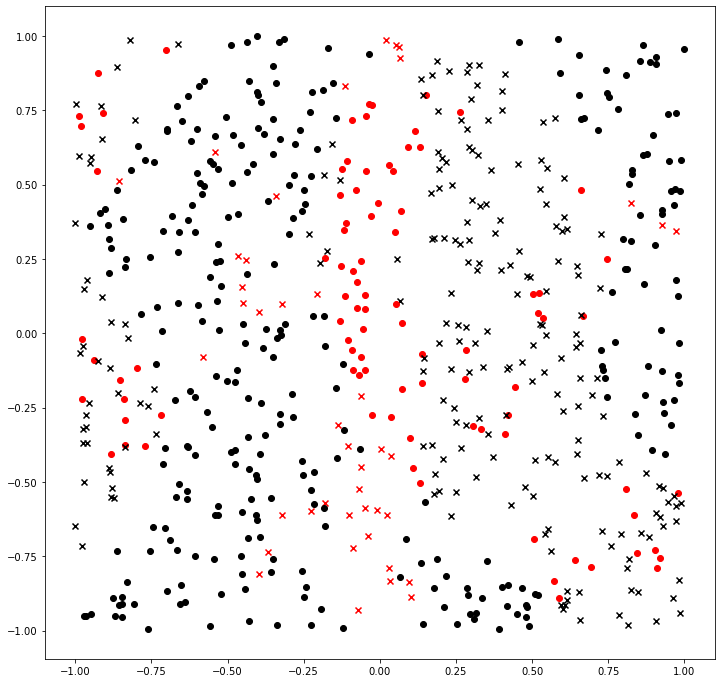

In [196]:
afficher(0,X_train,y_train,X_test,y_test, 0, 5,'rbf') 

Ici, le noyau gaussien donne sensiblement les mêmes résultats que le noyau polynomial